In [1]:
import matplotlib.pyplot as plt
from matplotlib import gridspec
import numpy as np
import math
from astropy.constants import c 
from astropy.io import fits
from skimage.transform import resize
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import tracemalloc

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

# import matplotlib as mpl
# mpl.rcParams['figure.dpi'] = 100
font = {'size': 40}

import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 300
mpl.rc_file_defaults()
mpl.rcParams['image.origin'] = 'lower'
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'

mpl.rc('font', **font)

In [58]:
%matplotlib notebook

# Stokes Ic images

In [2]:
def get_imshow_arrs(field_strength, snapshot, pos_or_neg = 'pos', neg_prefix = '-', wavelength_index = 115):
    if pos_or_neg is 'neg':
        neg_str = neg_prefix
    else:
        neg_str = ''
    
    STOKES_I_INDEX = 0
    stokes_Ic = fits.getdata(f"/export/local/scratch/sinjan/spinor_fwd/ngrey_{field_strength}G/{snapshot}/6173_masi_theta00/inverted_profs.1.fits")[:,:,STOKES_I_INDEX,100].mean()
    
    angs = ['00','25_9','37','45_5','53','60','66_5','72_6','75_5','78_4','84_2','84_2','87_2'] #0.25 and 0.15 mu not in the first plot shown
    angs_floats = ['00','25.9','37','45.5','53','60','66.5','72.6','75.5','78.4','81.4','84.2','87.2'] #0.25 and 0.15 mu not in the first plot shown
    stokes_I_list = [0]*13
    for i, ang in enumerate(angs):
        tmp_I = fits.getdata(f"/export/local/scratch/sinjan/spinor_fwd/ngrey_{field_strength}G/{snapshot}/6173_masi_theta{neg_str}{ang}/inverted_profs.1.fits")[:,:,STOKES_I_INDEX,wavelength_index]
        new_y_size = 288*np.cos(np.deg2rad(float(angs_floats[i])))
        new_I = resize(tmp_I, (int(new_y_size), 288), anti_aliasing=False)
        stokes_I_list[i] = new_I/stokes_Ic
        
    return stokes_I_list

In [4]:
stokes_I_30G = get_imshow_arrs(30, 200000, pos_or_neg = 'pos', wavelength_index=100)
stokes_I_50G = get_imshow_arrs(50, 200000, pos_or_neg = 'pos', wavelength_index=100)
stokes_I_100G = get_imshow_arrs(100, 200000, pos_or_neg = 'pos', wavelength_index=100)
stokes_I_120G = get_imshow_arrs(120, 200000, pos_or_neg = 'pos', wavelength_index=100)
stokes_I_200G = get_imshow_arrs(200, 200000, pos_or_neg = 'pos', wavelength_index=100)

In [5]:
tdir = "/data/sunrise/mhd/MURaM/MySimulations/MURaM_RUN_1/"

# 30G

In [6]:
cube = "20111009.30G.ngrey.288x100x288/"

bx_30 = fits.getdata(tdir + cube + 'result_5.200000.fits').astype(np.float64)*np.sqrt(4*math.pi)
bz_30 = fits.getdata(tdir + cube + 'result_6.200000.fits').astype(np.float64)*np.sqrt(4*math.pi)
by_30 = fits.getdata(tdir + cube + 'result_7.200000.fits').astype(np.float64)*np.sqrt(4*math.pi)

# 50G

In [7]:
cube = "20111009.50G.ngrey.288x100x288/"

bx_50 = fits.getdata(tdir + cube + 'result_5.200000.fits').astype(np.float64)*np.sqrt(4*math.pi)
bz_50 = fits.getdata(tdir + cube + 'result_6.200000.fits').astype(np.float64)*np.sqrt(4*math.pi)
by_50 = fits.getdata(tdir + cube + 'result_7.200000.fits').astype(np.float64)*np.sqrt(4*math.pi)

# 100G

In [8]:
cube = "20161029.100G.ngrey.288x100x288/"

bx_100 = fits.getdata(tdir + cube + 'result_5.200000.fits').astype(np.float64)*np.sqrt(4*math.pi)
bz_100 = fits.getdata(tdir + cube + 'result_6.200000.fits').astype(np.float64)*np.sqrt(4*math.pi)
by_100 = fits.getdata(tdir + cube + 'result_7.200000.fits').astype(np.float64)*np.sqrt(4*math.pi)

# 120G

In [9]:
cube = "20161101.120G.ngrey.288x100x288/"

bx_120 = fits.getdata(tdir + cube + 'result_5.200000.fits').astype(np.float64)*np.sqrt(4*math.pi)
bz_120 = fits.getdata(tdir + cube + 'result_6.200000.fits').astype(np.float64)*np.sqrt(4*math.pi)
by_120 = fits.getdata(tdir + cube + 'result_7.200000.fits').astype(np.float64)*np.sqrt(4*math.pi)

# 200G

In [10]:
cube = "20111012.200G.ngrey.288x100x288/"

bx_200 = fits.getdata(tdir + cube + 'result_5.200000.fits').astype(np.float64)*np.sqrt(4*math.pi)
bz_200 = fits.getdata(tdir + cube + 'result_6.200000.fits').astype(np.float64)*np.sqrt(4*math.pi)
by_200 = fits.getdata(tdir + cube + 'result_7.200000.fits').astype(np.float64)*np.sqrt(4*math.pi)

[1.0, 0.7013888888888888, 0.6006944444444444, 0.5, 0.3993055555555556, 0.2986111111111111, 0.25, 0.2013888888888889, 0.14930555555555555]


/home/sinjan/.conda/envs/dataproc/lib/python3.7/site-packages/ipykernel_launcher.py:593: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


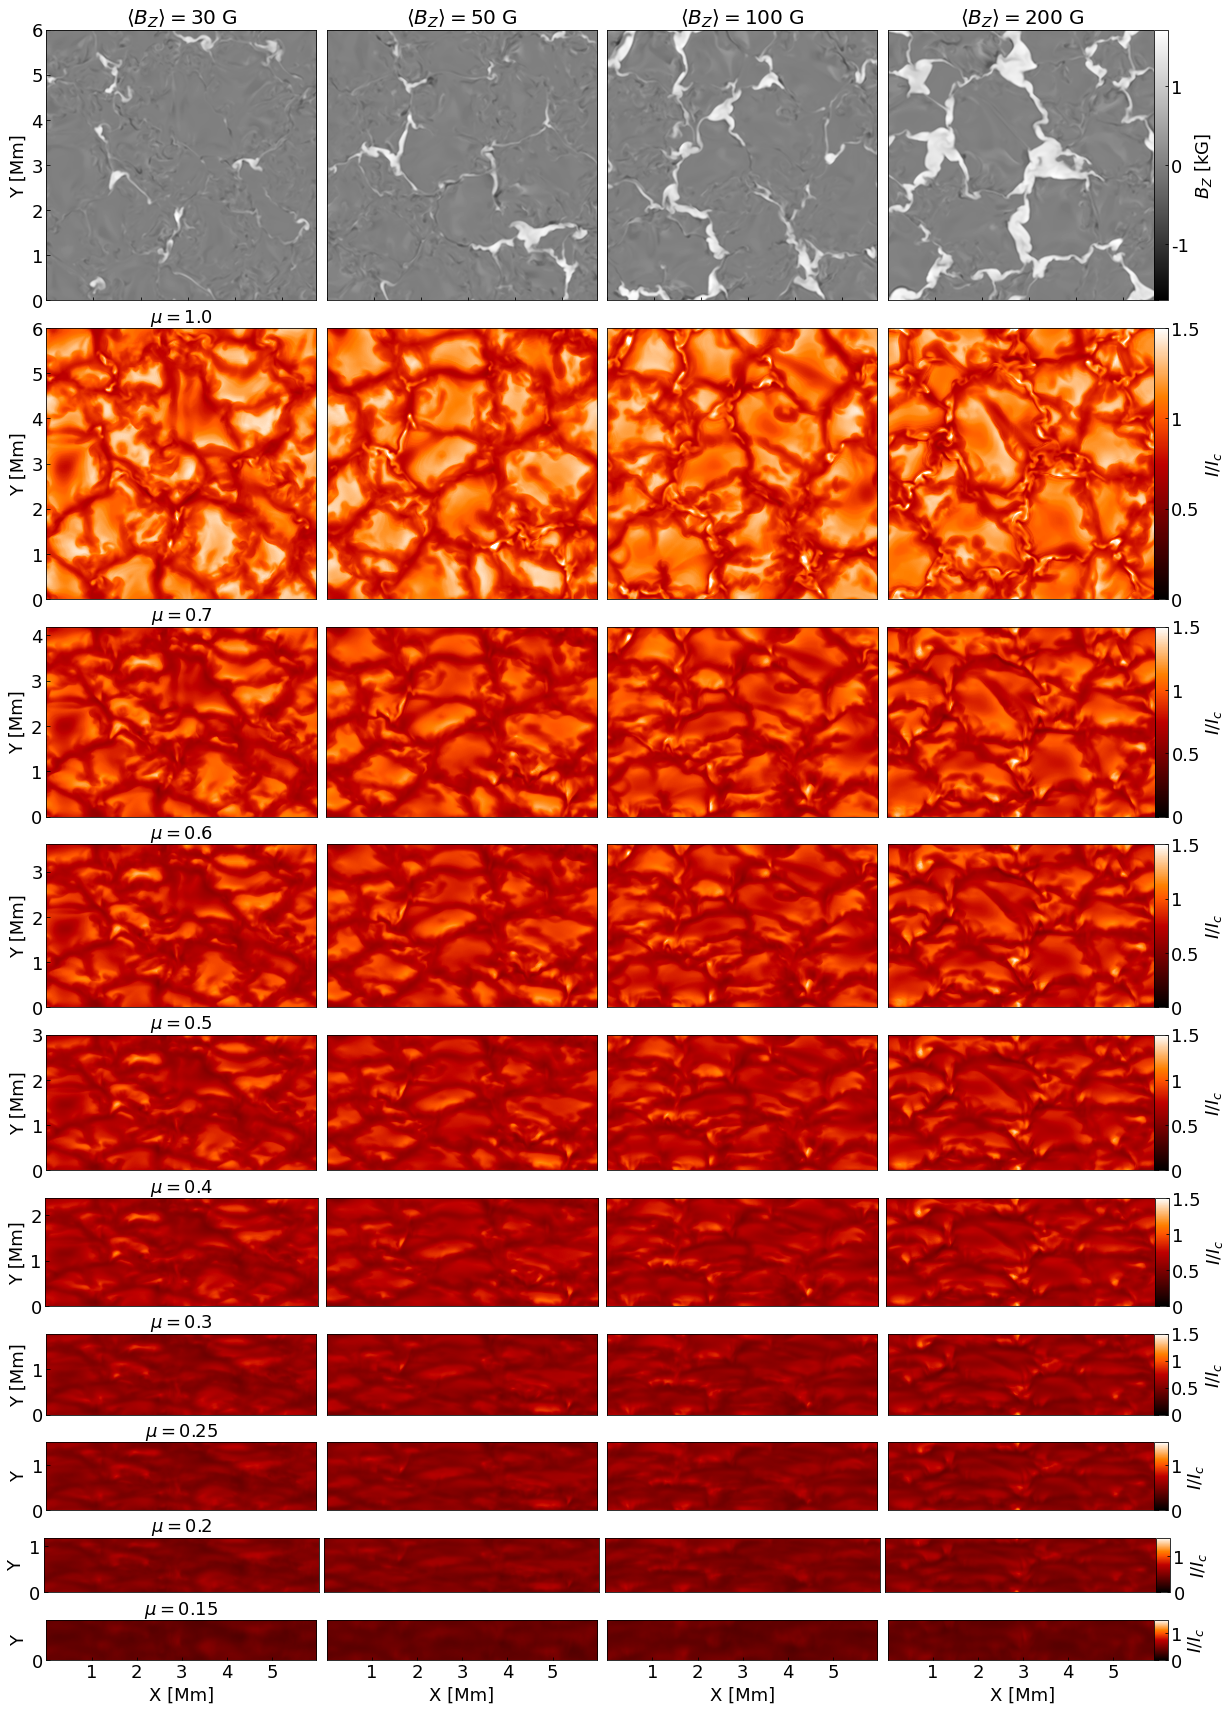

In [12]:
%matplotlib inline

fig = plt.figure(figsize = (20,30))

import sunpy.visualization.colormaps as cm
magmap = mpl.colormaps['hmimag']

nrows = 10
angs_floats = ['00','45.5','53','60','66.5','72.6','75.5','78.4','81.4']#'84.2','87.2']
ratios = [np.round(288*np.cos(np.deg2rad(float(ang))),0) for ang in angs_floats]
print([i/288 for i in ratios])
nratios = ratios[:nrows-1]/ratios[nrows-2]
comb = [nratios[0]] + list(nratios)

gs = fig.add_gridspec(nrows, 4, wspace=0.02, hspace=0.2, height_ratios = comb)

TEXT_BOX_ALPHA = 0.7
TEXT_X = 250
BZHEIGHT = 62
BZVMIN = -np.max(bz_200[:,BZHEIGHT,:])#np.min(bz_200[:,BZHEIGHT,:])
BZVMAX = np.max(bz_200[:,BZHEIGHT,:])
BORDERPAD = -5
IBORDERPAD = -1

#--------------------------------------
#30G
#--------------------------------------
ax_30 = fig.add_subplot(gs[0, 0])
im30 = ax_30.imshow(bz_30[:,BZHEIGHT,:], origin = "lower", vmin = BZVMIN, vmax = BZVMAX, cmap="gray")
VERT_DIM = 0.014 #Mm size of vertical pizel
height_str = BZHEIGHT * VERT_DIM
ax_30.set_title(r'$\langle B_{Z}\rangle = 30$ G', fontsize=20)
ax_30.set_xlim(0,287)
ax_30.set_ylim(0,288)
ax_30.set_aspect(1)

values = np.linspace(0,288,7)
ax_30.set_yticks(values)
ax_30.set_yticklabels(labels = [f"{i*20833/1e6:.2g}" for i in values], rotation = 0, fontsize=18)
ax_30.set_ylabel('Y [Mm]', fontsize=18)
plt.setp(ax_30.get_xticklabels(), visible=False)

#ax_30.tick_params(axis='x',which='both',bottom=False,top=False,labelbottom=False)
# axins = inset_axes(ax_30,width="100%",height="5%",loc='upper center',borderpad=BORDERPAD)
# cbar = fig.colorbar(im30, cax=axins, orientation="horizontal", ticks=[0, 500, 1000, 1500, 2000])
# cbar.ax.xaxis.set_ticks_position('top')
# cbar.ax.set_xticklabels(['0','0.5', '1', '1.5', '2'])

#--------------------------------------
#50G
#--------------------------------------

ax_50 = fig.add_subplot(gs[0, 1])
im50 = ax_50.imshow(bz_50[:,BZHEIGHT,:], origin = "lower", vmin = BZVMIN, vmax = BZVMAX, cmap="gray")
height_str = BZHEIGHT * VERT_DIM
ax_50.set_title(r'$\langle B_{Z}\rangle = 50$ G', fontsize=20)
ax_50.set_xlim(0,287)
ax_50.set_ylim(0,288)
ax_50.set_aspect(1)

plt.setp(ax_50.get_xticklabels(), visible=False)
plt.setp(ax_50.get_yticklabels(), visible=False)
ax_50.set_yticks([])

# axins = inset_axes(ax_50,width="100%",height="5%",loc='upper center',borderpad=BORDERPAD)
# cbar = fig.colorbar(im50, cax=axins, orientation="horizontal", ticks=[0, 500, 1000, 1500, 2000])
# cbar.ax.xaxis.set_ticks_position('top')
# cbar.ax.set_xticklabels(['0','0.5', '1', '1.5', '2'])

#--------------------------------------
#100G
#--------------------------------------

ax_100 = fig.add_subplot(gs[0, 2])
im100 = ax_100.imshow(bz_100[:,BZHEIGHT,:], origin = "lower", vmin = BZVMIN, vmax = BZVMAX, cmap="gray")
height_str = BZHEIGHT * VERT_DIM
ax_100.set_title(r'$\langle B_{Z}\rangle = 100$ G', fontsize=20)
ax_100.set_xlim(0,287)
ax_100.set_ylim(0,288)
ax_100.set_aspect(1)

plt.setp(ax_100.get_xticklabels(), visible=False)
plt.setp(ax_100.get_yticklabels(), visible=False)
ax_100.set_yticks([])

# axins = inset_axes(ax_100,width="100%",height="5%",loc='upper center',borderpad=BORDERPAD)
# cbar = fig.colorbar(im100, cax=axins, orientation="horizontal", ticks=[0, 500, 1000, 1500, 2000])
# cbar.ax.xaxis.set_ticks_position('top')
# cbar.ax.set_xticklabels(['0','0.5', '1', '1.5', '2'])

#--------------------------------------
#120G
#--------------------------------------

# ax_120 = fig.add_subplot(gs[0, 3])
# im120 = ax_120.imshow(bz_120[:,BZHEIGHT,:], origin = "lower", vmin = BZVMIN, vmax = BZVMAX)
# height_str = BZHEIGHT * VERT_DIM
# ax_120.set_title(r'$B_{Z}$ [kG]; $\langle B_{Z}\rangle = 120$ G')
# ax_120.set_xlim(0,287)
# ax_120.set_ylim(0,288)
# ax_120.set_aspect(1)

# plt.setp(ax_120.get_xticklabels(), visible=False)
# plt.setp(ax_120.get_yticklabels(), visible=False)
# ax_120.set_yticks([])

# axins = inset_axes(ax_120,width="100%",height="5%",loc='upper center',borderpad=BORDERPAD)
# cbar = fig.colorbar(im120, cax=axins, orientation="horizontal", ticks=[0, 500, 1000, 1500, 2000])
# cbar.ax.xaxis.set_ticks_position('top')
# cbar.ax.set_xticklabels(['0','0.5', '1', '1.5', '2'])

#--------------------------------------
#200G
#--------------------------------------

ax_200 = fig.add_subplot(gs[0, 3])
im200 = ax_200.imshow(bz_200[:,BZHEIGHT,:], origin = "lower", vmin = BZVMIN, vmax = BZVMAX, cmap="gray")
height_str = BZHEIGHT * VERT_DIM
ax_200.set_title(r'$\langle B_{Z}\rangle = 200$ G', fontsize=20) #f' at z={height_str}Mm'
ax_200.set_xlim(0,287)
ax_200.set_ylim(0,288)
ax_200.set_aspect(1)

plt.setp(ax_200.get_xticklabels(), visible=False)
plt.setp(ax_200.get_yticklabels(), visible=False)
ax_200.set_yticks([])

axins = inset_axes(ax_200,width="5%",height="100%",loc='center right',borderpad=IBORDERPAD)
cbar = fig.colorbar(im200, cax=axins, orientation="vertical", ticks=[-2000,-1000, 0, 1000, 2000])
cbar.ax.yaxis.set_ticks_position('right')
cbar.ax.set_yticklabels(['-2','-1','0', '1', '2'], fontsize=18)
cbar.set_label(r"$B_{Z}$ [kG]", fontsize=18)



#------------------------------------------------------------------------------------------------------------------
#STOKES IC
#------------------------------------------------------------------------------------------------------------------

def plot_stokes_I(ax, stokes, xlabel = None, ylabel = None, title=None, cbar = None, **kwargs):
    wavelength = np.linspace(-1.75,1.75,251)
    wv_idx = 100
    IVMIN = 0
    IVMAX = 1.5
    YTITLE = 1
    im = ax.imshow(stokes, origin = "lower", vmin = IVMIN, vmax = IVMAX, cmap = "gist_heat")
    if title is None:
        ax.set_title(r'Stokes $I/I_{c}$; at $\lambda$ = '+f'{wavelength[wv_idx]:.2g}'+r' $\AA$')
    elif not title:
        pass
    else:
        ax.set_title(f'{title}', y=YTITLE, fontsize=18)
    ax.set_xlim(0,287)
    ax.set_ylim(0,int(stokes.shape[0]))
    ax.set_aspect(1)

    values = np.linspace(0,288,7)

    if xlabel is not None:
        ax.set_xticks(values[1:6])
        ax.set_xticklabels(labels = ['1','2','3','4','5'], rotation = 0, fontsize=18)
        ax.set_xlabel('X [Mm]', fontsize=18)
    else:
        plt.setp(ax.get_xticklabels(), visible=False)
        ax.set_xticks([])
        
    if ylabel is not None:
        values_y = np.arange(0,int(stokes.shape[0])+1,48)
        ax.set_yticks(values_y)
        ax.set_yticklabels(labels = [f"{i*20833/1e6:.2g}" for i in values_y], rotation = 0, fontsize=18)
        if stokes.shape[0] < 75:
            ax.set_ylabel('Y', fontsize=18)
        else:
            ax.set_ylabel('Y [Mm]', fontsize=18)
    else:
        ax.set_yticks([])

    if cbar is not None:
        axins = inset_axes(ax,width="5%",height="100%",loc='center right',borderpad=IBORDERPAD)
        if stokes.shape[0] < 75:
            cbar = fig.colorbar(im, cax=axins, orientation="vertical", ticks=[0, 1])
            cbar.ax.set_yticklabels(['0','1'], fontsize=18)
        else:
            cbar = fig.colorbar(im, cax=axins, orientation="vertical", ticks=[0, 0.5, 1, 1.5])
            cbar.ax.set_yticklabels(['0','0.5', '1', '1.5'], fontsize=18)
        cbar.ax.yaxis.set_ticks_position('right')
        cbar.set_label(r"$I/I_c$", fontsize=18)
        plt.setp(ax.get_yticklabels(), visible=False)

IVMIN = 0
IVMAX = 1.5
IBORDERPAD = -1
wavelength = np.linspace(-1.75,1.75,251)
wv_idx = 100
YTITLE = -0.2

#######################################
# mu = 1.0
#######################################

#--------------------------------------
#30G
#--------------------------------------
ax_I30 = fig.add_subplot(gs[1, 0])
plot_stokes_I(ax_I30, stokes_I_30G[0], ylabel = True, title = r'$\mu=1.0$')

#--------------------------------------
#50G
#--------------------------------------

ax_I50 = fig.add_subplot(gs[1, 1])
plot_stokes_I(ax_I50, stokes_I_50G[0], title = False)

#--------------------------------------
#100G
#--------------------------------------

ax_I100 = fig.add_subplot(gs[1, 2])
plot_stokes_I(ax_I100, stokes_I_100G[0], title = False)
# #--------------------------------------
# #120G
# #--------------------------------------

# ax_I120 = fig.add_subplot(gs[1, 3])
# plot_stokes_I(ax_I120, stokes_I_120G[0], title = False)
#--------------------------------------
#200G
#--------------------------------------

ax_I200 = fig.add_subplot(gs[1, 3])
plot_stokes_I(ax_I200, stokes_I_200G[0], title = False, cbar = True)

#######################################
# mu = 0.7
#######################################
mu_idx = 3
#--------------------------------------
#30G
#--------------------------------------
ax_I30 = fig.add_subplot(gs[2, 0])
plot_stokes_I(ax_I30, stokes_I_30G[mu_idx], ylabel = True, title = r'$\mu = 0.7$')

#--------------------------------------
#50G
#--------------------------------------

ax_I50 = fig.add_subplot(gs[2, 1])
plot_stokes_I(ax_I50, stokes_I_50G[mu_idx], title = False)

#--------------------------------------
#100G
#--------------------------------------

ax_I100 = fig.add_subplot(gs[2, 2])
plot_stokes_I(ax_I100, stokes_I_100G[mu_idx], title = False)
# #--------------------------------------
# #120G
# #--------------------------------------

# ax_I120 = fig.add_subplot(gs[2, 3])
# plot_stokes_I(ax_I120, stokes_I_120G[mu_idx], title = False)
#--------------------------------------
#200G
#--------------------------------------

ax_I200 = fig.add_subplot(gs[2, 3])
plot_stokes_I(ax_I200, stokes_I_200G[mu_idx], title = False, cbar = True)

#######################################
# mu = 0.6
#######################################
mu_idx = 4
#--------------------------------------
#30G
#--------------------------------------
ax_I30 = fig.add_subplot(gs[3, 0])
plot_stokes_I(ax_I30, stokes_I_30G[mu_idx], ylabel = True, title = r'$\mu = 0.6$')

#--------------------------------------
#50G
#--------------------------------------

ax_I50 = fig.add_subplot(gs[3, 1])
plot_stokes_I(ax_I50, stokes_I_50G[mu_idx], title = False)

#--------------------------------------
#100G
#--------------------------------------

ax_I100 = fig.add_subplot(gs[3, 2])
plot_stokes_I(ax_I100, stokes_I_100G[mu_idx], title = False)
# #--------------------------------------
# #120G
# #--------------------------------------

# ax_I120 = fig.add_subplot(gs[3, 3])
# plot_stokes_I(ax_I120, stokes_I_120G[mu_idx], title = False)
#--------------------------------------
#200G
#--------------------------------------

ax_I200 = fig.add_subplot(gs[3, 3])
plot_stokes_I(ax_I200, stokes_I_200G[mu_idx], title = False, cbar = True)

#######################################
# mu = 0.5
#######################################
mu_idx = 5
#--------------------------------------
#30G
#--------------------------------------
ax_I30 = fig.add_subplot(gs[4, 0])
plot_stokes_I(ax_I30, stokes_I_30G[mu_idx], ylabel = True, title = r'$\mu = 0.5$')

#--------------------------------------
#50G
#--------------------------------------

ax_I50 = fig.add_subplot(gs[4, 1])
plot_stokes_I(ax_I50, stokes_I_50G[mu_idx], title = False)

#--------------------------------------
#100G
#--------------------------------------

ax_I100 = fig.add_subplot(gs[4, 2])
plot_stokes_I(ax_I100, stokes_I_100G[mu_idx], title = False)
# #--------------------------------------
# #120G
# #--------------------------------------

# ax_I120 = fig.add_subplot(gs[4, 3])
# plot_stokes_I(ax_I120, stokes_I_120G[mu_idx], title = False)
#--------------------------------------
#200G
#--------------------------------------

ax_I200 = fig.add_subplot(gs[4, 3])
plot_stokes_I(ax_I200, stokes_I_200G[mu_idx], title = False, cbar = True)

#######################################
# mu = 0.4
#######################################
mu_idx = 6
#--------------------------------------
#30G
#--------------------------------------
ax_I30 = fig.add_subplot(gs[5, 0])
plot_stokes_I(ax_I30, stokes_I_30G[mu_idx], ylabel = True, title = r'$\mu = 0.4$')

#--------------------------------------
#50G
#--------------------------------------

ax_I50 = fig.add_subplot(gs[5, 1])
plot_stokes_I(ax_I50, stokes_I_50G[mu_idx], title = False)

#--------------------------------------
#100G
#--------------------------------------

ax_I100 = fig.add_subplot(gs[5, 2])
plot_stokes_I(ax_I100, stokes_I_100G[mu_idx], title = False)
# #--------------------------------------
# #120G
# #--------------------------------------

# ax_I120 = fig.add_subplot(gs[5, 3])
# plot_stokes_I(ax_I120, stokes_I_120G[mu_idx], title = False)
#--------------------------------------
#200G
#--------------------------------------

ax_I200 = fig.add_subplot(gs[5, 3])
plot_stokes_I(ax_I200, stokes_I_200G[mu_idx], title = False, cbar = True)
        
#######################################
# mu = 0.3
#######################################
mu_idx = 7
#--------------------------------------
#30G
#--------------------------------------
ax_I30 = fig.add_subplot(gs[6, 0])
plot_stokes_I(ax_I30, stokes_I_30G[mu_idx], ylabel = True, title = r'$\mu = 0.3$')

#--------------------------------------
#50G
#--------------------------------------

ax_I50 = fig.add_subplot(gs[6, 1])
plot_stokes_I(ax_I50, stokes_I_50G[mu_idx], title = False)

#--------------------------------------
#100G
#--------------------------------------

ax_I100 = fig.add_subplot(gs[6, 2])
plot_stokes_I(ax_I100, stokes_I_100G[mu_idx], title = False)
# #--------------------------------------
# #120G
# #--------------------------------------

# ax_I120 = fig.add_subplot(gs[6, 3])
# plot_stokes_I(ax_I120, stokes_I_120G[mu_idx], title = False)
#--------------------------------------
#200G
#--------------------------------------

ax_I200 = fig.add_subplot(gs[6, 3])
plot_stokes_I(ax_I200, stokes_I_200G[mu_idx], title = False, cbar = True)

#######################################
# mu = 0.25
#######################################
mu_idx = 8
#--------------------------------------
#30G
#--------------------------------------
ax_I30 = fig.add_subplot(gs[7, 0])
plot_stokes_I(ax_I30, stokes_I_30G[mu_idx], ylabel = True, title = r'$\mu = 0.25$')

#--------------------------------------
#50G
#--------------------------------------

ax_I50 = fig.add_subplot(gs[7, 1])
plot_stokes_I(ax_I50, stokes_I_50G[mu_idx], title = False)

#--------------------------------------
#100G
#--------------------------------------

ax_I100 = fig.add_subplot(gs[7, 2])
plot_stokes_I(ax_I100, stokes_I_100G[mu_idx], title = False)
# #--------------------------------------
# #120G
# #--------------------------------------

# ax_I120 = fig.add_subplot(gs[7, 3])
# plot_stokes_I(ax_I120, stokes_I_120G[mu_idx], title = False)
#--------------------------------------
#200G
#--------------------------------------

ax_I200 = fig.add_subplot(gs[7, 3])
plot_stokes_I(ax_I200, stokes_I_200G[mu_idx], title = False, cbar = True)

#######################################
# mu = 0.2
#######################################
mu_idx = 9
#--------------------------------------
#30G
#--------------------------------------
ax_I30 = fig.add_subplot(gs[8, 0])
plot_stokes_I(ax_I30, stokes_I_30G[mu_idx], ylabel = True, title = r'$\mu = 0.2$')

#--------------------------------------
#50G
#--------------------------------------

ax_I50 = fig.add_subplot(gs[8, 1])
plot_stokes_I(ax_I50, stokes_I_50G[mu_idx], title = False)

#--------------------------------------
#100G
#--------------------------------------

ax_I100 = fig.add_subplot(gs[8, 2])
plot_stokes_I(ax_I100, stokes_I_100G[mu_idx], title = False)
# #--------------------------------------
# #120G
# #--------------------------------------

# ax_I120 = fig.add_subplot(gs[8, 3])
# plot_stokes_I(ax_I120, stokes_I_120G[mu_idx], title = False)
#--------------------------------------
#200G
#--------------------------------------

ax_I200 = fig.add_subplot(gs[8, 3])
plot_stokes_I(ax_I200, stokes_I_200G[mu_idx], title = False, cbar = True)

#######################################
# mu = 0.15
#######################################
mu_idx = 10
#--------------------------------------
#30G
#--------------------------------------
ax_I30 = fig.add_subplot(gs[9, 0])
plot_stokes_I(ax_I30, stokes_I_30G[mu_idx], xlabel = True, ylabel = True, title = r'$\mu = 0.15$')

#--------------------------------------
#50G
#--------------------------------------

ax_I50 = fig.add_subplot(gs[9, 1])
plot_stokes_I(ax_I50, stokes_I_50G[mu_idx], xlabel = True, title = False)

#--------------------------------------
#100G
#--------------------------------------

ax_I100 = fig.add_subplot(gs[9, 2])
plot_stokes_I(ax_I100, stokes_I_100G[mu_idx], xlabel = True, title = False)
# #--------------------------------------
# #120G
# #--------------------------------------

# ax_I120 = fig.add_subplot(gs[9, 3])
# plot_stokes_I(ax_I120, stokes_I_120G[mu_idx], title = False)
#--------------------------------------
#200G
#--------------------------------------

ax_I200 = fig.add_subplot(gs[9, 3])
plot_stokes_I(ax_I200, stokes_I_200G[mu_idx], xlabel = True, title = False, cbar = True)

# #######################################
# # mu = 0.1
# #######################################
# mu_idx = 11
# #--------------------------------------
# #30G
# #--------------------------------------
# ax_I30 = fig.add_subplot(gs[10, 0])
# plot_stokes_I(ax_I30, stokes_I_30G[mu_idx], ylabel = True, title = r'$\mu = 0.1$')

# #--------------------------------------
# #50G
# #--------------------------------------

# ax_I50 = fig.add_subplot(gs[10, 1])
# plot_stokes_I(ax_I50, stokes_I_50G[mu_idx], title = False)

# #--------------------------------------
# #100G
# #--------------------------------------

# ax_I100 = fig.add_subplot(gs[10, 2])
# plot_stokes_I(ax_I100, stokes_I_100G[mu_idx], title = False)
# #--------------------------------------
# #120G
# #--------------------------------------

# ax_I120 = fig.add_subplot(gs[10, 3])
# plot_stokes_I(ax_I120, stokes_I_120G[mu_idx], title = False)
# #--------------------------------------
# #200G
# #--------------------------------------

# ax_I200 = fig.add_subplot(gs[10, 4])
# plot_stokes_I(ax_I200, stokes_I_200G[mu_idx], title = False, cbar = True)

# #######################################
# # mu = 0.05
# #######################################
# mu_idx = 12
# #--------------------------------------
# #30G
# #--------------------------------------
# ax_I30 = fig.add_subplot(gs[11, 0])
# plot_stokes_I(ax_I30, stokes_I_30G[mu_idx], xlabel = True, ylabel = True, title = r'$\mu = 0.05$')

# #--------------------------------------
# #50G
# #--------------------------------------

# ax_I50 = fig.add_subplot(gs[11, 1])
# plot_stokes_I(ax_I50, stokes_I_50G[mu_idx], xlabel = True, title = False)

# #--------------------------------------
# #100G
# #--------------------------------------

# ax_I100 = fig.add_subplot(gs[11, 2])
# plot_stokes_I(ax_I100, stokes_I_100G[mu_idx], xlabel = True, title = False)
# # #--------------------------------------
# # #120G
# # #--------------------------------------

# # ax_I120 = fig.add_subplot(gs[11, 3])
# # plot_stokes_I(ax_I120, stokes_I_120G[mu_idx], xlabel = True, title = False)
# #--------------------------------------
# #200G
# #--------------------------------------

# ax_I200 = fig.add_subplot(gs[11, 4])
# plot_stokes_I(ax_I200, stokes_I_200G[mu_idx], xlabel = True, title = False, cbar = True)
    
plt.tight_layout()
plt.savefig('./plots/bz_stokes_clv_map_100cont.png', dpi=300, bbox_inches='tight', transparent=False)
plt.show()